In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [40]:
data = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
print(type(data))
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
(2111, 17)


In [41]:
nrow_count = data.shape[0] 
print(nrow_count)

2111


In [42]:
data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [44]:
data[(data.duplicated())]

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
98   Female  21.0    1.52    42.0                             no   no   3.0   
106  Female  25.0    1.57    55.0                             no  yes   2.0   
174    Male  21.0    1.62    70.0                             no  yes   2.0   
179    Male  21.0    1.62    70.0                             no  yes   2.0   
184    Male  21.0    1.62    70.0                             no  yes   2.0   
209  Female  22.0    1.69    65.0                            yes  yes   2.0   
309  Female  16.0    1.66    58.0                             no   no   2.0   
460  Female  18.0    1.62    55.0                            yes  yes   2.0   
467    Male  22.0    1.74    75.0                            yes  yes   3.0   
496    Male  18.0    1.72    53.0                            yes  yes   2.0   
527  Female  21.0    1.52    42.0                             no  yes   3.0   
659  Female  21.0    1.52    42.0                             no  yes   3.0   
663  Female  21.0    1.52    42.0                             no  yes   3.0   
763    Male  21.0    1.62    70.0                             no  yes   2.0   
764    Male  21.0    1.62    70.0                             no  yes   2.0   
824    Male  21.0    1.62    70.0                             no  yes   2.0   
830    Male  21.0    1.62    70.0                             no  yes   2.0   
831    Male  21.0    1.62    70.0                             no  yes   2.0   
832    Male  21.0    1.62    70.0                             no  yes   2.0   
833    Male  21.0    1.62    70.0                             no  yes   2.0   
834    Male  21.0    1.62    70.0                             no  yes   2.0   
921    Male  21.0    1.62    70.0                             no  yes   2.0   
922    Male  21.0    1.62    70.0                             no  yes   2.0   
923    Male  21.0    1.62    70.0                             no  yes   2.0   

     NCP        CAEC SMOKE  CH2O SCC  FAF  TUE       CALC  \
98   1.0  Frequently    no   1.0  no  0.0  0.0  Sometimes   
106  1.0   Sometimes    no   2.0  no  2.0  0.0  Sometimes   
174  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
179  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
184  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
209  3.0   Sometimes    no   2.0  no  1.0  1.0  Sometimes   
309  1.0   Sometimes    no   1.0  no  0.0  1.0         no   
460  3.0  Frequently    no   1.0  no  1.0  1.0         no   
467  3.0  Frequently    no   1.0  no  1.0  0.0         no   
496  3.0   Sometimes    no   2.0  no  0.0  2.0  Sometimes   
527  1.0  Frequently    no   1.0  no  0.0  0.0  Sometimes   
659  1.0  Frequently    no   1.0  no  0.0  0.0  Sometimes   
663  1.0  Frequently    no   1.0  no  0.0  0.0  Sometimes   
763  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
764  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
824  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
830  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
831  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
832  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
833  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
834  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
921  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
922  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
923  1.0          no    no   3.0  no  1.0  0.0  Sometimes   

                    MTRANS           NObeyesdad  
98   Public_Transportation  Insufficient_Weight  
106  Public_Transportation        Normal_Weight  
174  Public_Transportation   Overweight_Level_I  
179  Public_Transportation   Overweight_Level_I  
184  Public_Transportation   Overweight_Level_I  
209  Public_Transportation        Normal_Weight  
309                Walking        Normal_Weight  
460  Public_Transportation        Normal_Weight  
467             Automobile        Normal_Weight  
496

In [45]:
data = data.drop_duplicates()
data[(data.duplicated())]

Empty DataFrame
Columns: [Gender, Age, Height, Weight, family_history_with_overweight, FAVC, FCVC, NCP, CAEC, SMOKE, CH2O, SCC, FAF, TUE, CALC, MTRANS, NObeyesdad]
Index: []

In [46]:
data.describe() 

Age       Height       Weight         FCVC          NCP  \
count  2087.000000  2087.000000  2087.000000  2087.000000  2087.000000   
mean     24.353090     1.702674    86.858730     2.421466     2.701179   
std       6.368801     0.093186    26.190847     0.534737     0.764614   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.915937     1.630178    66.000000     2.000000     2.697467   
50%      22.847618     1.701584    83.101100     2.396265     3.000000   
75%      26.000000     1.769491   108.015907     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2087.000000  2087.000000  2087.000000  
mean      2.004749     1.012812     0.663035  
std       0.608284     0.853475     0.608153  
min       1.000000     0.000000     0.000000  
25%       1.590922     0.124505     0.000000  
50%       2.000000     1.000000     0.630866  
75%       2.466193     1.678102     1.000000  
max       3.000000     3.000000     2.000000

In [47]:
data = data.drop(columns=["SMOKE", "CH2O", "SCC", "TUE", "MTRANS"])

In [48]:
insuf_w = data['NObeyesdad'].value_counts()["Insufficient_Weight"]
norm_w = data['NObeyesdad'].value_counts()["Normal_Weight"]
over1_1 = data['NObeyesdad'].value_counts()["Overweight_Level_I"]
overw_2 = data['NObeyesdad'].value_counts()["Overweight_Level_II"]
obesity_1 = data['NObeyesdad'].value_counts()["Obesity_Type_I"]
obesity_2 = data['NObeyesdad'].value_counts()["Obesity_Type_II"]
obesity_3  = data['NObeyesdad'].value_counts()["Obesity_Type_III"]

print("Insufficient_Weight: " + str(insuf_w) + " - " + "Normal_Weight: " + str(norm_w) + " - " + "Overweight_Level_I: " + str(over1_1) + " - " + "Overweight_Level_II: " + str(overw_2) + " - " + "Obesity_Type_I: " + str(obesity_1) + " - " + "Obesity_Type_II: " + str(obesity_2) + " - " + "Obesity_Type_III: " + str(obesity_3))


Insufficient_Weight: 267 - Normal_Weight: 282 - Overweight_Level_I: 276 - Overweight_Level_II: 290 - Obesity_Type_I: 351 - Obesity_Type_II: 297 - Obesity_Type_III: 324


In [49]:
data.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC  FAF        CALC           NObeyesdad  
0  3.0  Sometimes  0.0          no        Normal_Weight  
1  3.0  Sometimes  3.0   Sometimes        Normal_Weight  
2  3.0  Sometimes  2.0  Frequently        Normal_Weight  
3  3.0  Sometimes  2.0  Frequently   Overweight_Level_I  
4  1.0  Sometimes  0.0   Sometimes  Overweight_Level_II

In [50]:
# Enumerating all the classifications

obesity_class_to_num = {
    "Insufficient_Weight": -1,
    "Normal_Weight": 0,
    "Overweight_Level_I": 1,
    "Overweight_Level_II": 2,
    "Obesity_Type_I": 3,
    "Obesity_Type_II": 4,
    "Obesity_Type_III": 5
}

gender_to_num = {
    "Male": 0,
    "Female": 1
}

family_history_with_overweight_to_bin = {
    "yes": 1,
    "no": 0
}

favc_to_bin = {
    "yes": 1,
    "no": 0
}

caec_to_int = {
    "no": 0,
    "Sometimes": 1,
    "Frequently": 2,
    "Always": 3
}

calc_to_int = {
    "no": 0,
    "Sometimes": 1,
    "Frequently": 2,
    "Always": 3
}

data['NObeyesdad'] = data['NObeyesdad'].map(obesity_class_to_num)
data['Gender'] = data['Gender'].map(gender_to_num)
data['family_history_with_overweight'] = data['family_history_with_overweight'].map(family_history_with_overweight_to_bin)
data['FAVC'] = data['FAVC'].map(favc_to_bin)
data['CAEC'] = data['CAEC'].map(caec_to_int)
data['CALC'] = data['CALC'].map(calc_to_int)

In [51]:
data.head()

Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       1  21.0    1.62    64.0                               1     0   2.0   
1       1  21.0    1.52    56.0                               1     0   3.0   
2       0  23.0    1.80    77.0                               1     0   2.0   
3       0  27.0    1.80    87.0                               0     0   3.0   
4       0  22.0    1.78    89.8                               0     0   2.0   

   NCP  CAEC  FAF  CALC  NObeyesdad  
0  3.0     1  0.0     0           0  
1  3.0     1  3.0     1           0  
2  3.0     1  2.0     2           0  
3  3.0     1  2.0     2           1  
4  1.0     1  0.0     1           2

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2087 entries, 0 to 2110
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   int64  
 1   Age                             2087 non-null   float64
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   int64  
 5   FAVC                            2087 non-null   int64  
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   CAEC                            2087 non-null   int64  
 9   FAF                             2087 non-null   float64
 10  CALC                            2087 non-null   int64  
 11  NObeyesdad                      2087 non-null   int64  
dtypes: float64(6), int64(6)
memory usa

In [53]:
data.describe()

Gender          Age       Height       Weight  \
count  2087.000000  2087.000000  2087.000000  2087.000000   
mean      0.495927    24.353090     1.702674    86.858730   
std       0.500103     6.368801     0.093186    26.190847   
min       0.000000    14.000000     1.450000    39.000000   
25%       0.000000    19.915937     1.630178    66.000000   
50%       0.000000    22.847618     1.701584    83.101100   
75%       1.000000    26.000000     1.769491   108.015907   
max       1.000000    61.000000     1.980000   173.000000   

       family_history_with_overweight         FAVC         FCVC          NCP  \
count                     2087.000000  2087.000000  2087.000000  2087.000000   
mean                         0.825108     0.883565     2.421466     2.701179   
std                          0.379966     0.320823     0.534737     0.764614   
min                          0.000000     0.000000     1.000000     1.000000   
25%                          1.000000     1.000000     2.000000     2.697467   
50%                          1.000000     1.000000     2.396265     3.000000   
75%                          1.000000     1.000000     3.000000     3.000000   
max                          1.000000     1.000000     3.000000     4.000000   

              CAEC          FAF         CALC   NObeyesdad  
count  2087.000000  2087.000000  2087.000000  2087.000000  
mean      1.146143     1.012812     0.729756     2.132247  
std       0.459494     0.853475     0.517008     1.985747  
min       0.000000     0.000000     0.000000    -1.000000  
25%       1.000000     0.124505     0.000000     0.000000  
50%       1.000000     1.000000     1.000000     2.000000  
75%       1.000000     1.678102     1.000000     4.000000  
max       3.000000     3.000000     3.000000     5.000000

{'whiskers': [<matplotlib.lines.Line2D at 0x19f65d4b4d0>,
 'caps': [<matplotlib.lines.Line2D at 0x19f6734c1d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19f65d4bad0>],
 'medians': [<matplotlib.lines.Line2D at 0x19f6734e610>],
 'fliers': [<matplotlib.lines.Line2D at 0x19f65d4b650>],
 'means': []}

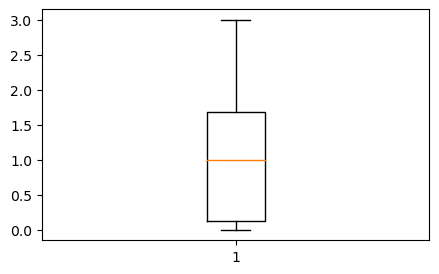

In [54]:
plt.boxplot(data["FAF"])

{'whiskers': [<matplotlib.lines.Line2D at 0x19f65d73b90>,
 'caps': [<matplotlib.lines.Line2D at 0x19f65d72510>,
 'boxes': [<matplotlib.lines.Line2D at 0x19f65d70410>],
 'medians': [<matplotlib.lines.Line2D at 0x19f65d719d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19f662139d0>],
 'means': []}

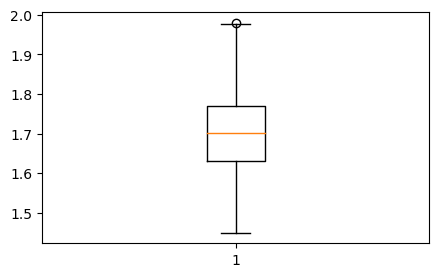

In [55]:
plt.boxplot(data["Height"])

{'whiskers': [<matplotlib.lines.Line2D at 0x19f66203850>,
 'caps': [<matplotlib.lines.Line2D at 0x19f66209d50>,
 'boxes': [<matplotlib.lines.Line2D at 0x19f66200c50>],
 'medians': [<matplotlib.lines.Line2D at 0x19f66209b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x19f66208c90>],
 'means': []}

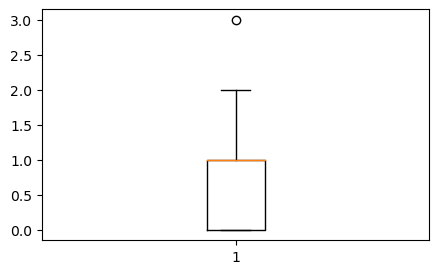

In [56]:
plt.boxplot(data["CALC"])

{'whiskers': [<matplotlib.lines.Line2D at 0x19f65cc5bd0>,
 'caps': [<matplotlib.lines.Line2D at 0x19f65cc5290>,
 'boxes': [<matplotlib.lines.Line2D at 0x19f65cc7c90>],
 'medians': [<matplotlib.lines.Line2D at 0x19f66118290>],
 'fliers': [<matplotlib.lines.Line2D at 0x19f66118110>],
 'means': []}

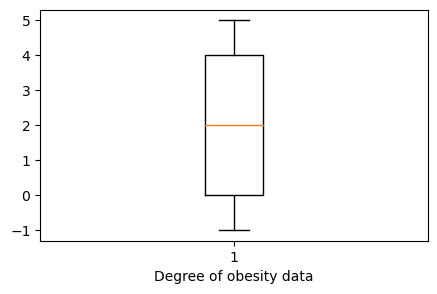

In [57]:
plt.xlabel("Degree of obesity data")
plt.boxplot(data["NObeyesdad"])

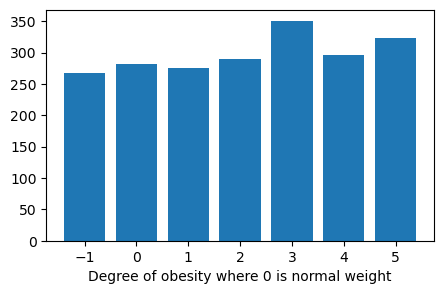

In [58]:
#Checking distribution
bin_edges = [-1.5, -0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5]

plt.hist(data["NObeyesdad"], bins=bin_edges, rwidth=0.8)
plt.xlabel("Degree of obesity where 0 is normal weight")
plt.xticks(range(-1, 6))
plt.show()

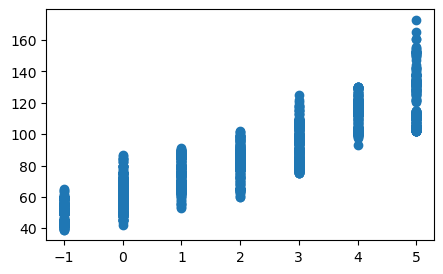

In [59]:
plt.scatter(data["NObeyesdad"], data["Weight"])

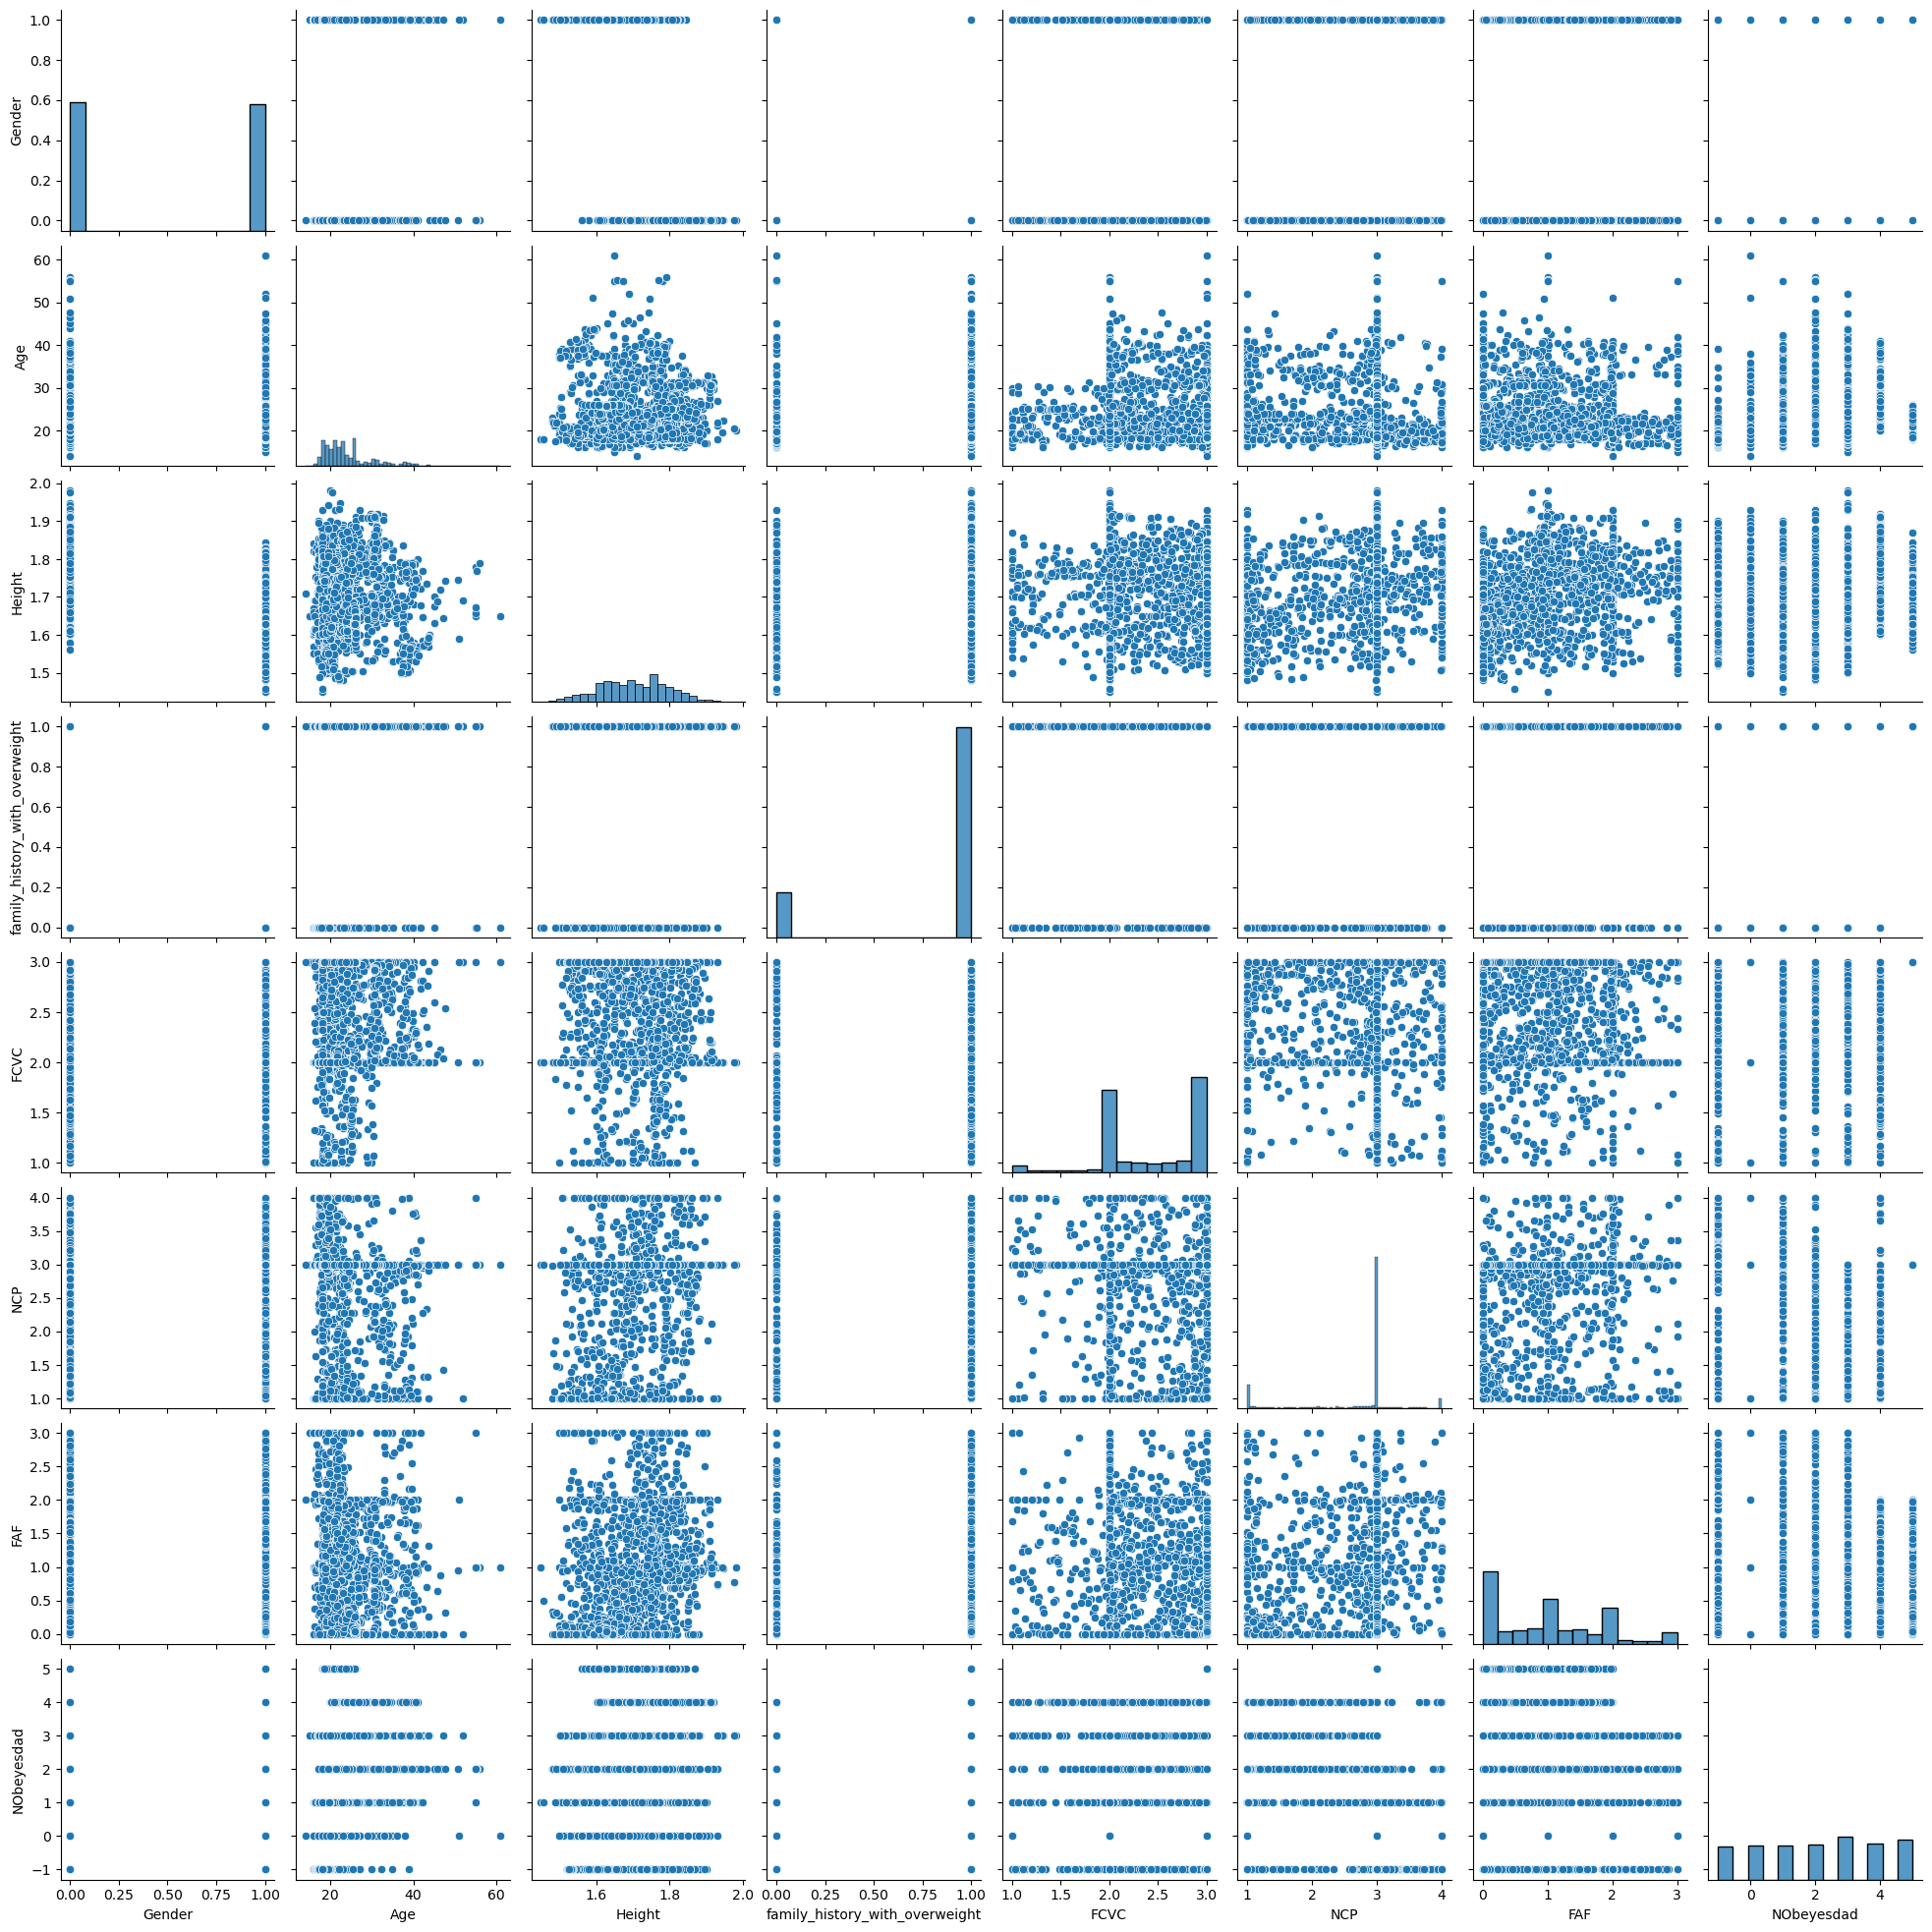

In [60]:
pairplot_data = data.drop(columns=["Weight", "FAVC", "CAEC", "CALC"])
sns.pairplot(pairplot_data)

Text(0.5, 0.98, 'Feature pairplot')

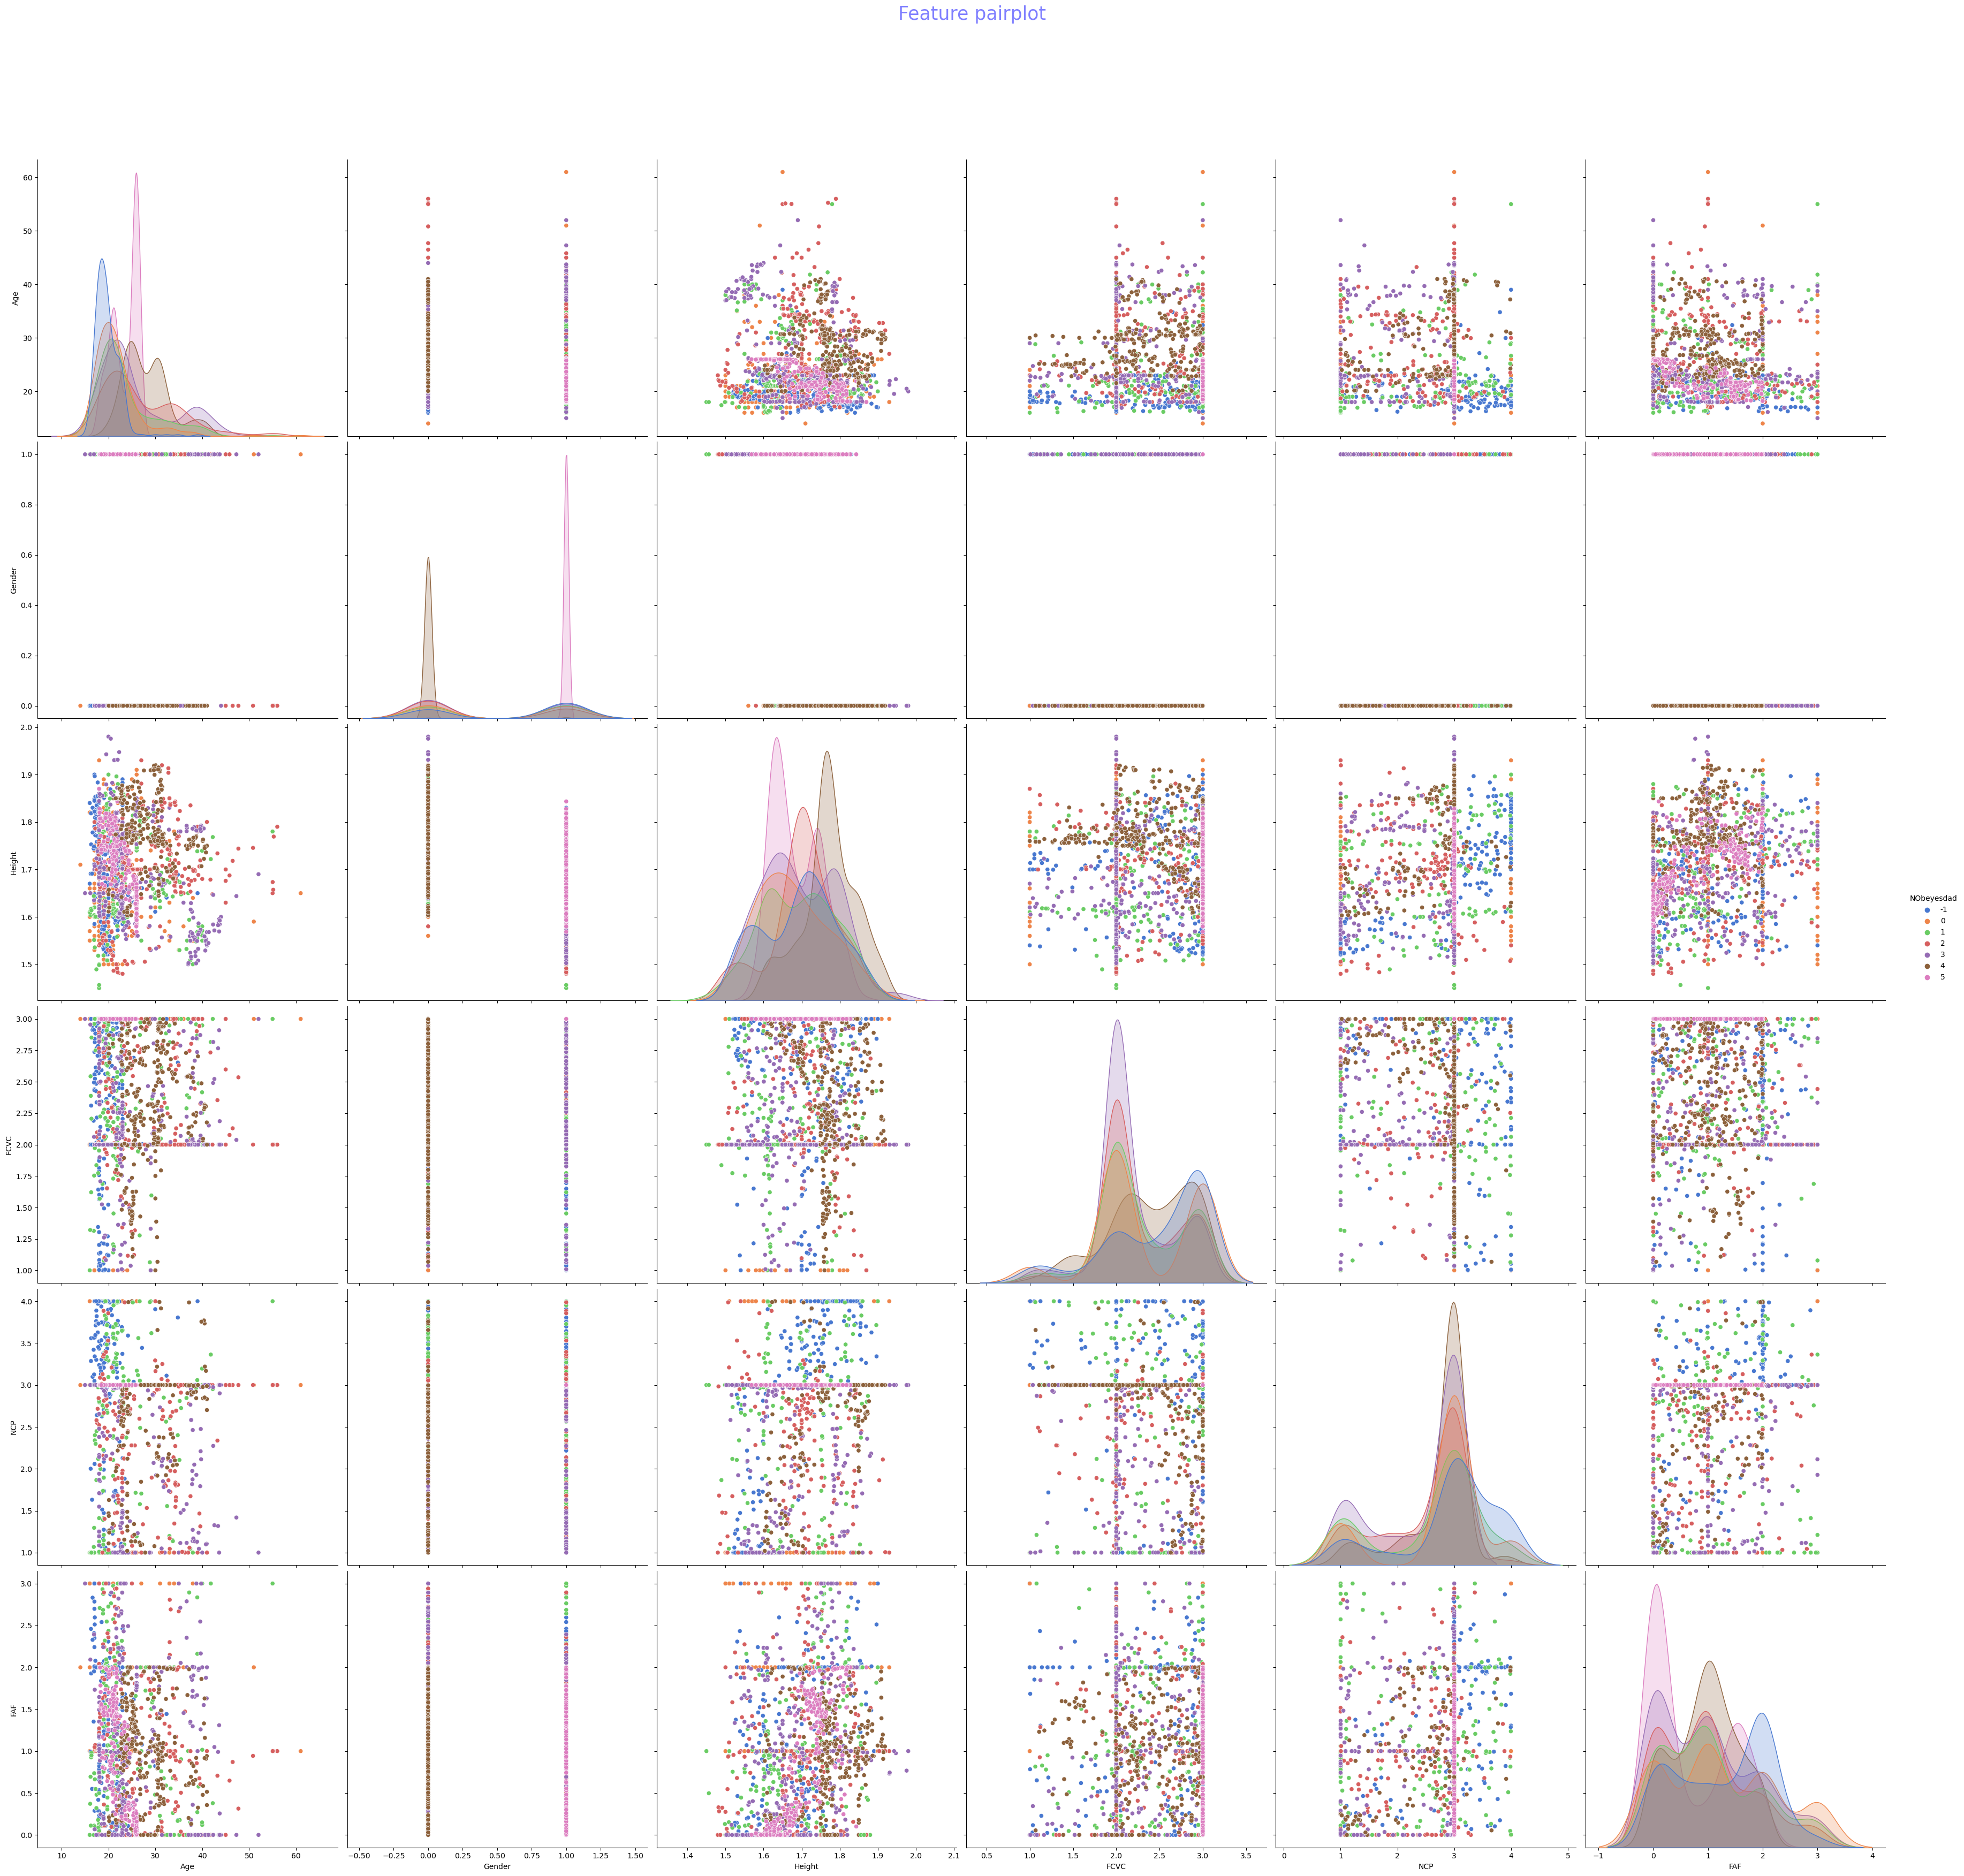

In [61]:
# Plairplot with classification
my_pairplot = sns.pairplot(data,hue='NObeyesdad',palette="muted",height=6,vars=['Age','Gender','Height','FCVC','NCP', 'FAF'],kind='scatter')
# Extra space to display the title correctly
plt.subplots_adjust(top=0.9)
my_pairplot.fig.suptitle('Feature pairplot',fontsize=25,color='b',alpha=0.5)

In [62]:
# Analysis
print(data["Age"].describe())
print("Median:" + str(data["Age"].median()))

count    2087.000000
mean       24.353090
std         6.368801
min        14.000000
25%        19.915937
50%        22.847618
75%        26.000000
max        61.000000
Name: Age, dtype: float64
Median:22.847618


In [63]:
print(data["NCP"].describe())
print("Median:" + str(data["NCP"].median()))

count    2087.000000
mean        2.701179
std         0.764614
min         1.000000
25%         2.697467
50%         3.000000
75%         3.000000
max         4.000000
Name: NCP, dtype: float64
Median:3.0


In [64]:
print(data["FCVC"].describe())
print("Median:" + str(data["FCVC"].median()))

count    2087.000000
mean        2.421466
std         0.534737
min         1.000000
25%         2.000000
50%         2.396265
75%         3.000000
max         3.000000
Name: FCVC, dtype: float64
Median:2.396265


In [65]:
#obtain a datset containing only one feature of interest
training_data = data[["Gender", "Age", "Height", "family_history_with_overweight", "FAVC", "FCVC", "NCP","CAEC", "FAF", "CALC"]]
#containing tagte values
target = data['NObeyesdad']
#setting the size of the train and test datasets (70% for training data, 30% - for test data)
training_proportion = 0.9
#splitting the dataset into test and train sets using a random 70:30 split
X_train, X_test, y_train, y_test = train_test_split(training_data, target, test_size=1.0 - training_proportion, random_state=42)
NObeyesdad = LinearRegression(fit_intercept=True)        #Initialisation of the regression model
NObeyesdad.fit(X_train,y_train)#Training the regression model using the data on culmen lenght available in the train dataset
print('Coefficient: \n', NObeyesdad.coef_)               #Displaying the model weights
print('Intercept: \n', NObeyesdad.intercept_)            #Displaying the bias coefficient of the model
#Intercept represents the value of the dependent variable (target) when all independent variables (predictors) are equal to zero.
# =================== Apply the model to all values of the culmen length in the dataset======================
y_test_pred = NObeyesdad.predict(X_test) #Obtaining predictions with the trained model
#print(y_test_pred)
#dislaying the coefficient of determination
print(NObeyesdad.score(X_test,y_test))

Coefficient: 
 [ 0.36613311  0.04578844  2.13718667  1.97114869  0.59792256  0.75670953
  0.05222713 -1.02608068 -0.36404923  0.3475673 ]
Intercept: 
 -5.631173074650004
0.4345478824727733


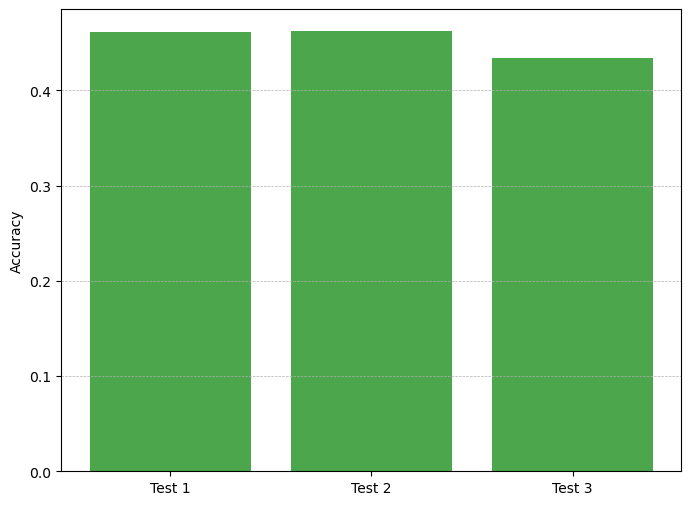

In [66]:
# Plotting accuracies of Linear regression model
accuracies = [0.461, 0.462, 0.434]

tests = range(len(accuracies))

plt.figure(figsize=(8, 6))  
plt.bar(tests, accuracies, color='green', alpha=0.7)

plt.ylabel('Accuracy')
plt.xticks(tests, [f'Test {i+1}' for i in tests]) 
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')  

plt.show()

In [67]:
# K-NN model training
training_proportion = 0.5
X_train, X_test, y_train, y_test = train_test_split(training_data, target, test_size=1.0 - training_proportion, random_state=42)

# Initializing and training the k-NN model
knn_model = KNeighborsClassifier(n_neighbors=4)  # You can adjust the number of neighbors (k) as needed
knn_model.fit(X_train, y_train)

# Making predictions on the test set
y_test_pred = knn_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6819923371647509


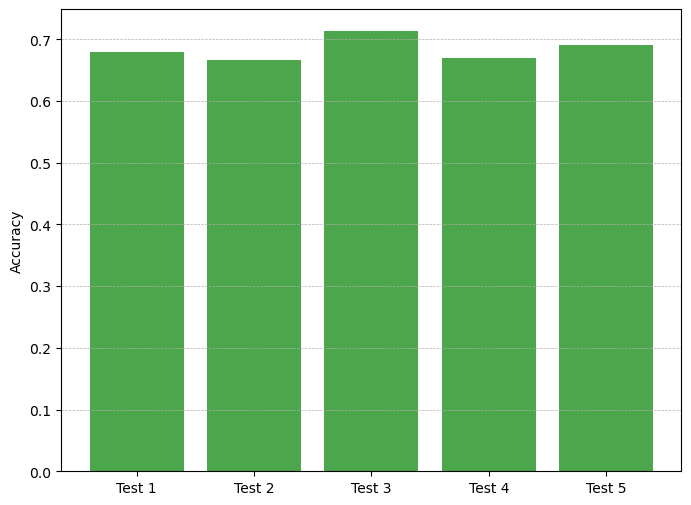

In [68]:
# Plotting the accuracies
accuracies = [0.679,0.666,0.713,0.669,0.691]

tests = range(len(accuracies))

plt.figure(figsize=(8, 6))  
plt.bar(tests, accuracies, color='green', alpha=0.7)

plt.ylabel('Accuracy')
plt.xticks(tests, [f'Test {i+1}' for i in tests]) 
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')  

plt.show()

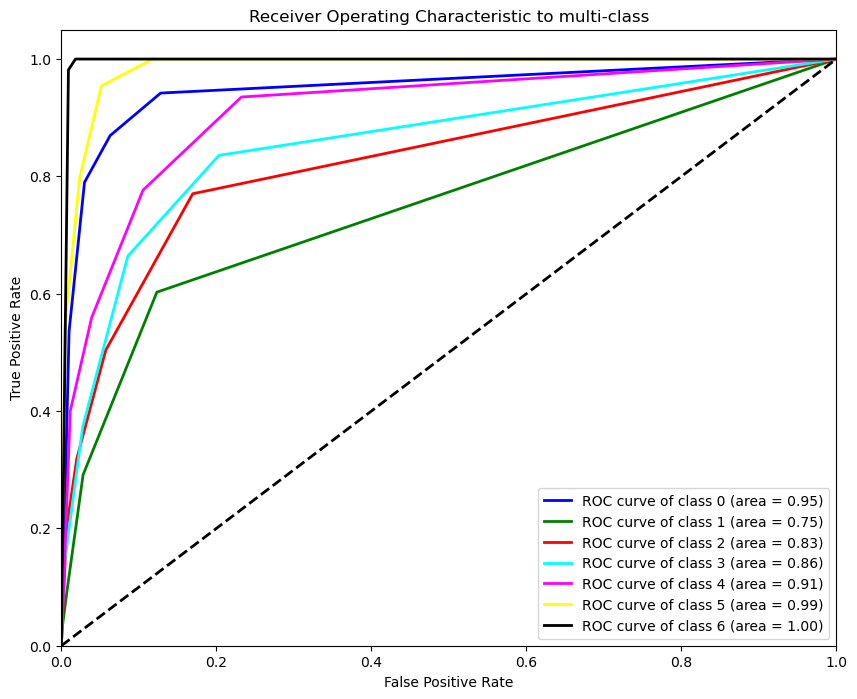

In [69]:
# This was all done for separation of the classes so they could be seen as binary
training_proportion = 0.5
X_train, X_test, y_train, y_test = train_test_split(training_data, target, test_size=1.0 - training_proportion, random_state=42)

y_train_bin = label_binarize(y_train, classes=np.unique(target))
y_test_bin = label_binarize(y_test, classes=np.unique(target))
n_classes = y_train_bin.shape[1]

knn_model = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=4)) # Using this function in the lib
knn_model.fit(X_train, y_train_bin)

y_test_proba = knn_model.predict_proba(X_test)


fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_test_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))

colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [70]:
data.info
print(int(0.5 * 2110))
print(int(0.7 * 2110))
print(int(0.8 * 2110))
print(int(0.9 * 2110))

1055
1477
1688
1899


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[0.6281076374910857, 0.47430154960597803, 0.4301067095103198, 0.3739271998912167, 0.37926113854841315, 0.3164673320631866, 0.3046675861536959, 0.29928635447295876]


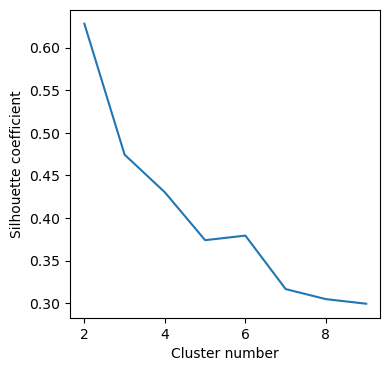

In [71]:
Silhouette_coefficient = []

for i in range(2,10):
   #Creation of a K-means clustering model where the number of clusters (n_clusters) is equal to the loop 
#iteration number (2, 3..) 
   kmeans_model = KMeans(n_clusters = i, init = "k-means++")
   
   kmeans_model.fit(training_data)
   #Calculating the Silhouette coeffcient
   Silhouette_coefficient.append(metrics.silhouette_score(training_data, kmeans_model.labels_))
print(Silhouette_coefficient)
#representing the results visually
plt.figure(figsize=(4,4))
plt.plot(range(2,10), Silhouette_coefficient)
plt.xlabel('Cluster number')
plt.ylabel('Silhouette coefficient')
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


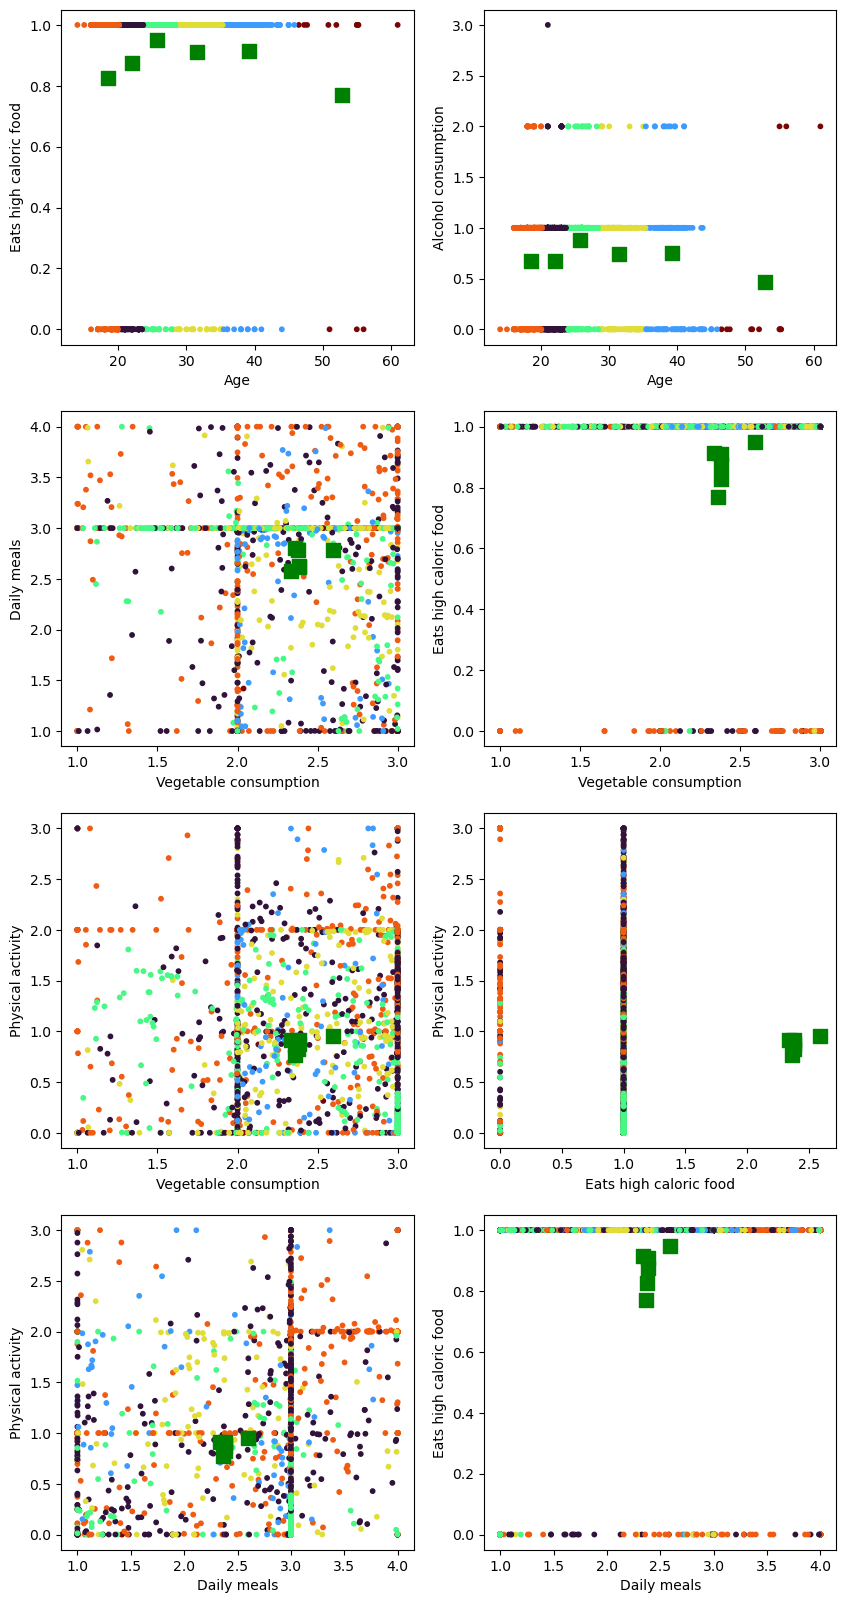

In [72]:
# K-means 1
clustering_data_k_means = data[["Age", "Height", "FAVC", "FCVC", "NCP","CAEC", "FAF", "CALC"]]
kmeans_model = KMeans(n_clusters=6, init = "k-means++").fit(clustering_data_k_means)

centroids = kmeans_model.cluster_centers_
y_pred = kmeans_model.predict(clustering_data_k_means)
plt.figure(figsize=(10, 20))
plt.subplot(4,2,1)
plt.ylabel("Eats high caloric food")
plt.xlabel("Age")
plt.scatter(clustering_data_k_means['Age'], clustering_data_k_means['FAVC'], s = 10, c = y_pred, cmap='turbo')
plt.scatter(centroids[:,0], centroids[:,2], s = 100, c = 'g', marker = 's')
plt.subplot(4,2,2)
plt.ylabel("Alcohol consumption")
plt.xlabel("Age")
plt.scatter(clustering_data_k_means['Age'], clustering_data_k_means['CALC'], s = 10, c = y_pred, cmap='turbo')
plt.scatter(centroids[:,0], centroids[:,7], s = 100, c = 'g', marker = 's')
plt.subplot(4,2,3)
plt.ylabel("Daily meals")
plt.xlabel("Vegetable consumption")
plt.scatter(clustering_data_k_means['FCVC'], clustering_data_k_means['NCP'], s = 10, c = y_pred, cmap='turbo')
plt.scatter(centroids[:,3], centroids[:,4], s = 100, c = 'g', marker = 's')
plt.subplot(4,2,4)
plt.ylabel("Eats high caloric food")
plt.xlabel("Vegetable consumption")
plt.scatter(clustering_data_k_means['FCVC'], clustering_data_k_means['FAVC'], s = 10, c = y_pred, cmap='turbo')
plt.scatter(centroids[:,3], centroids[:,2], s = 100, c = 'g', marker = 's')
plt.subplot(4,2,5)
plt.ylabel("Physical activity")
plt.xlabel("Vegetable consumption")
plt.scatter(clustering_data_k_means['FCVC'], clustering_data_k_means['FAF'], s = 10, c = y_pred, cmap='turbo')
plt.scatter(centroids[:,3], centroids[:,2], s = 100, c = 'g', marker = 's')
plt.subplot(4,2,6)
plt.ylabel("Physical activity")
plt.xlabel("Eats high caloric food")
plt.scatter(clustering_data_k_means['FAVC'], clustering_data_k_means['FAF'], s = 10, c = y_pred, cmap='turbo')
plt.scatter(centroids[:,3], centroids[:,2], s = 100, c = 'g', marker = 's')
plt.subplot(4,2,7)
plt.ylabel("Physical activity")
plt.xlabel("Daily meals")
plt.scatter(clustering_data_k_means['NCP'], clustering_data_k_means['FAF'], s = 10, c = y_pred, cmap='turbo')
plt.scatter(centroids[:,3], centroids[:,2], s = 100, c = 'g', marker = 's')
plt.subplot(4,2,8)
plt.ylabel("Eats high caloric food")
plt.xlabel("Daily meals")
plt.scatter(clustering_data_k_means['NCP'], clustering_data_k_means['FAVC'], s = 10, c = y_pred, cmap='turbo')
plt.scatter(centroids[:,3], centroids[:,2], s = 100, c = 'g', marker = 's')
plt.show()



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


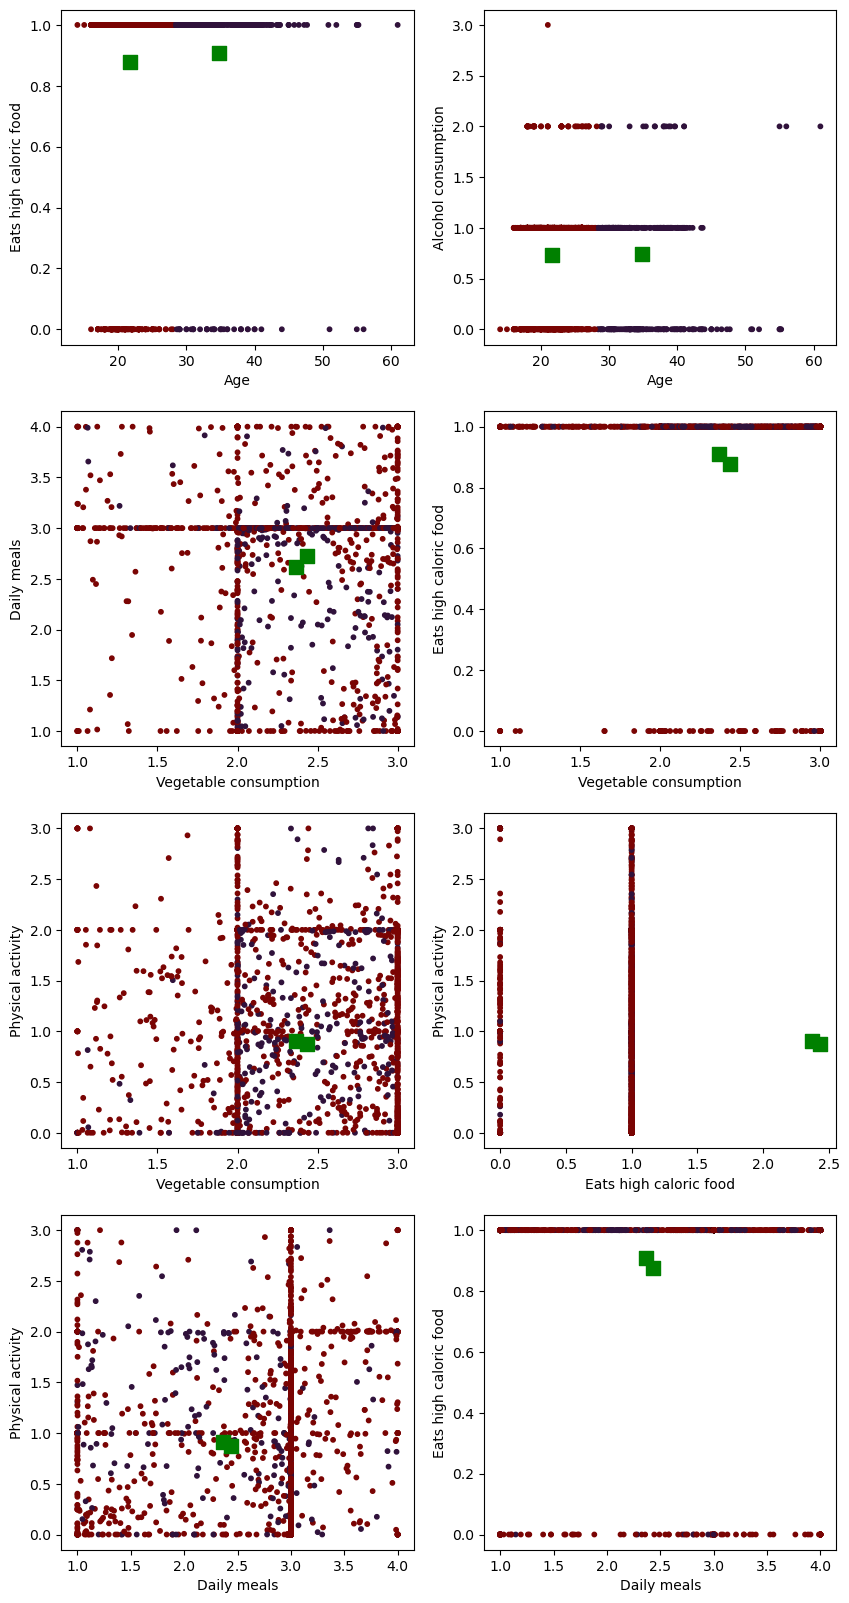

In [73]:
# K-means 1
clustering_data_k_means = data[["Age", "Height", "FAVC", "FCVC", "NCP","CAEC", "FAF", "CALC"]]
kmeans_model = KMeans(n_clusters=2, init = "k-means++").fit(clustering_data_k_means)

centroids = kmeans_model.cluster_centers_
y_pred = kmeans_model.predict(clustering_data_k_means)
plt.figure(figsize=(10, 20))
plt.subplot(4,2,1)
plt.ylabel("Eats high caloric food")
plt.xlabel("Age")
plt.scatter(clustering_data_k_means['Age'], clustering_data_k_means['FAVC'], s = 10, c = y_pred, cmap='turbo')
plt.scatter(centroids[:,0], centroids[:,2], s = 100, c = 'g', marker = 's')
plt.subplot(4,2,2)
plt.ylabel("Alcohol consumption")
plt.xlabel("Age")
plt.scatter(clustering_data_k_means['Age'], clustering_data_k_means['CALC'], s = 10, c = y_pred, cmap='turbo')
plt.scatter(centroids[:,0], centroids[:,7], s = 100, c = 'g', marker = 's')
plt.subplot(4,2,3)
plt.ylabel("Daily meals")
plt.xlabel("Vegetable consumption")
plt.scatter(clustering_data_k_means['FCVC'], clustering_data_k_means['NCP'], s = 10, c = y_pred, cmap='turbo')
plt.scatter(centroids[:,3], centroids[:,4], s = 100, c = 'g', marker = 's')
plt.subplot(4,2,4)
plt.ylabel("Eats high caloric food")
plt.xlabel("Vegetable consumption")
plt.scatter(clustering_data_k_means['FCVC'], clustering_data_k_means['FAVC'], s = 10, c = y_pred, cmap='turbo')
plt.scatter(centroids[:,3], centroids[:,2], s = 100, c = 'g', marker = 's')
plt.subplot(4,2,5)
plt.ylabel("Physical activity")
plt.xlabel("Vegetable consumption")
plt.scatter(clustering_data_k_means['FCVC'], clustering_data_k_means['FAF'], s = 10, c = y_pred, cmap='turbo')
plt.scatter(centroids[:,3], centroids[:,2], s = 100, c = 'g', marker = 's')
plt.subplot(4,2,6)
plt.ylabel("Physical activity")
plt.xlabel("Eats high caloric food")
plt.scatter(clustering_data_k_means['FAVC'], clustering_data_k_means['FAF'], s = 10, c = y_pred, cmap='turbo')
plt.scatter(centroids[:,3], centroids[:,2], s = 100, c = 'g', marker = 's')
plt.subplot(4,2,7)
plt.ylabel("Physical activity")
plt.xlabel("Daily meals")
plt.scatter(clustering_data_k_means['NCP'], clustering_data_k_means['FAF'], s = 10, c = y_pred, cmap='turbo')
plt.scatter(centroids[:,3], centroids[:,2], s = 100, c = 'g', marker = 's')
plt.subplot(4,2,8)
plt.ylabel("Eats high caloric food")
plt.xlabel("Daily meals")
plt.scatter(clustering_data_k_means['NCP'], clustering_data_k_means['FAVC'], s = 10, c = y_pred, cmap='turbo')
plt.scatter(centroids[:,3], centroids[:,2], s = 100, c = 'g', marker = 's')
plt.show()


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


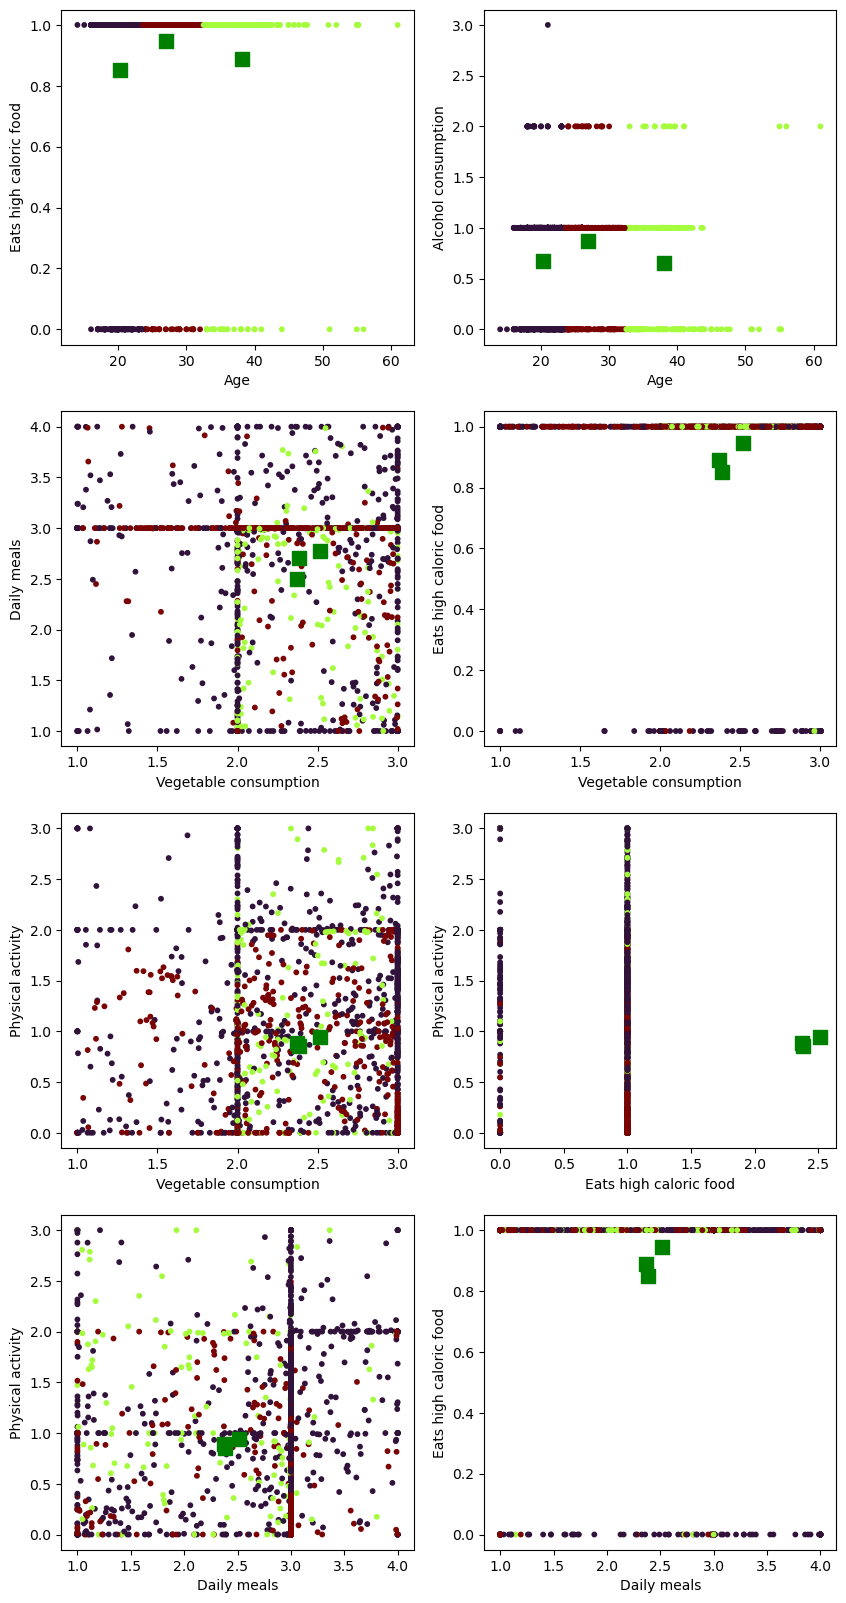

In [74]:
# K-means 3
clustering_data_k_means = data[["Age", "Height", "FAVC", "FCVC", "NCP","CAEC", "FAF", "CALC"]]
kmeans_model = KMeans(n_clusters=3, init = "k-means++").fit(clustering_data_k_means)

centroids = kmeans_model.cluster_centers_
y_pred = kmeans_model.predict(clustering_data_k_means)
plt.figure(figsize=(10, 20))
plt.subplot(4,2,1)
plt.ylabel("Eats high caloric food")
plt.xlabel("Age")
plt.scatter(clustering_data_k_means['Age'], clustering_data_k_means['FAVC'], s = 10, c = y_pred, cmap='turbo')
plt.scatter(centroids[:,0], centroids[:,2], s = 100, c = 'g', marker = 's')
plt.subplot(4,2,2)
plt.ylabel("Alcohol consumption")
plt.xlabel("Age")
plt.scatter(clustering_data_k_means['Age'], clustering_data_k_means['CALC'], s = 10, c = y_pred, cmap='turbo')
plt.scatter(centroids[:,0], centroids[:,7], s = 100, c = 'g', marker = 's')
plt.subplot(4,2,3)
plt.ylabel("Daily meals")
plt.xlabel("Vegetable consumption")
plt.scatter(clustering_data_k_means['FCVC'], clustering_data_k_means['NCP'], s = 10, c = y_pred, cmap='turbo')
plt.scatter(centroids[:,3], centroids[:,4], s = 100, c = 'g', marker = 's')
plt.subplot(4,2,4)
plt.ylabel("Eats high caloric food")
plt.xlabel("Vegetable consumption")
plt.scatter(clustering_data_k_means['FCVC'], clustering_data_k_means['FAVC'], s = 10, c = y_pred, cmap='turbo')
plt.scatter(centroids[:,3], centroids[:,2], s = 100, c = 'g', marker = 's')
plt.subplot(4,2,5)
plt.ylabel("Physical activity")
plt.xlabel("Vegetable consumption")
plt.scatter(clustering_data_k_means['FCVC'], clustering_data_k_means['FAF'], s = 10, c = y_pred, cmap='turbo')
plt.scatter(centroids[:,3], centroids[:,2], s = 100, c = 'g', marker = 's')
plt.subplot(4,2,6)
plt.ylabel("Physical activity")
plt.xlabel("Eats high caloric food")
plt.scatter(clustering_data_k_means['FAVC'], clustering_data_k_means['FAF'], s = 10, c = y_pred, cmap='turbo')
plt.scatter(centroids[:,3], centroids[:,2], s = 100, c = 'g', marker = 's')
plt.subplot(4,2,7)
plt.ylabel("Physical activity")
plt.xlabel("Daily meals")
plt.scatter(clustering_data_k_means['NCP'], clustering_data_k_means['FAF'], s = 10, c = y_pred, cmap='turbo')
plt.scatter(centroids[:,3], centroids[:,2], s = 100, c = 'g', marker = 's')
plt.subplot(4,2,8)
plt.ylabel("Eats high caloric food")
plt.xlabel("Daily meals")
plt.scatter(clustering_data_k_means['NCP'], clustering_data_k_means['FAVC'], s = 10, c = y_pred, cmap='turbo')
plt.scatter(centroids[:,3], centroids[:,2], s = 100, c = 'g', marker = 's')
plt.show()

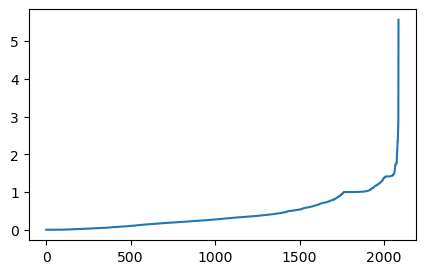

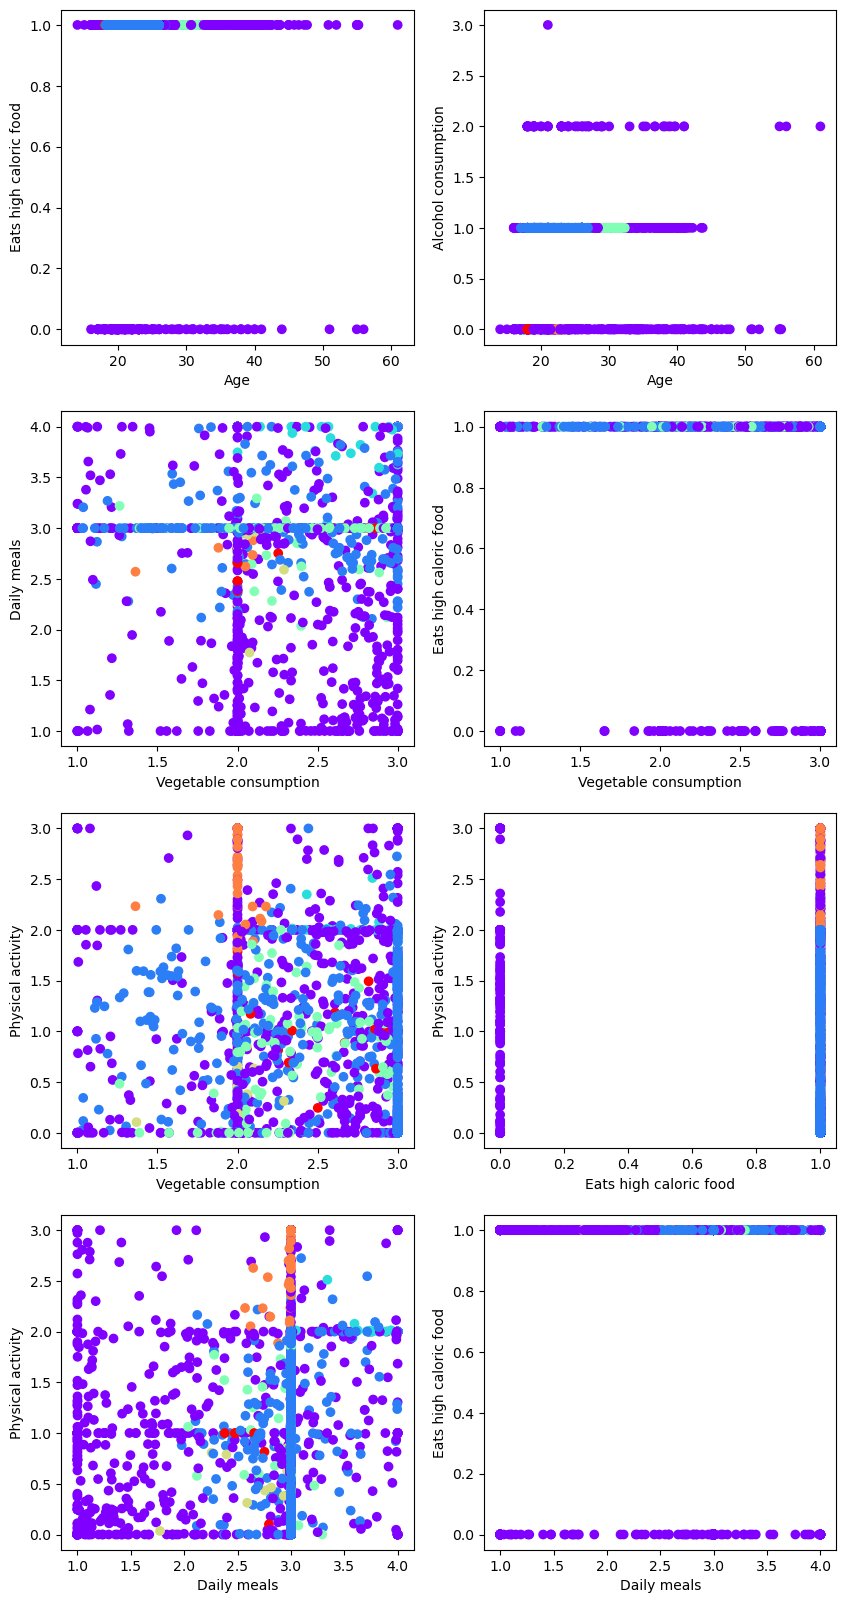

In [75]:
clustering_data_DBSCAN = data[["Age", "Height", "FAVC", "FCVC", "NCP","CAEC", "FAF", "CALC"]]
neighbors = NearestNeighbors(n_neighbors=8) 
neighbor_model=neighbors.fit(clustering_data_DBSCAN) 
distances,indices=neighbor_model.kneighbors(clustering_data_DBSCAN) 
# Sort and plot the distances results
distances = np.sort(distances, axis = 0)
distances = distances[:, 1] 
plt.rcParams['figure.figsize'] = (5,3) 
plt.plot(distances) 
plt.show() 

dbscan_clustering = DBSCAN(eps=0.9, min_samples=20).fit(clustering_data_DBSCAN)
labels = dbscan_clustering.labels_
plt.figure(figsize=(10, 20))


plt.subplot(4,2,1)
plt.scatter(clustering_data_DBSCAN['Age'], clustering_data_DBSCAN['FAVC'], c=labels, cmap='rainbow')
plt.ylabel("Eats high caloric food")
plt.xlabel("Age")

plt.subplot(4,2,2)
plt.scatter(clustering_data_DBSCAN['Age'], clustering_data_DBSCAN['CALC'], c=labels, cmap='rainbow')
plt.ylabel("Alcohol consumption")
plt.xlabel("Age")


plt.subplot(4,2,3)
plt.scatter(clustering_data_DBSCAN['FCVC'], clustering_data_DBSCAN['NCP'], c=labels, cmap='rainbow')
plt.ylabel("Daily meals")
plt.xlabel("Vegetable consumption")


plt.subplot(4,2,4)
plt.scatter(clustering_data_DBSCAN['FCVC'], clustering_data_DBSCAN['FAVC'], c=labels, cmap='rainbow')
plt.ylabel("Eats high caloric food")
plt.xlabel("Vegetable consumption")


plt.subplot(4,2,5)
plt.scatter(clustering_data_DBSCAN['FCVC'], clustering_data_DBSCAN['FAF'], c=labels, cmap='rainbow')
plt.ylabel("Physical activity")
plt.xlabel("Vegetable consumption")


plt.subplot(4,2,6)
plt.scatter(clustering_data_DBSCAN['FAVC'], clustering_data_DBSCAN['FAF'], c=labels, cmap='rainbow')
plt.ylabel("Physical activity")
plt.xlabel("Eats high caloric food")


plt.subplot(4,2,7)
plt.scatter(clustering_data_DBSCAN['NCP'], clustering_data_DBSCAN['FAF'], c=labels, cmap='rainbow')
plt.ylabel("Physical activity")
plt.xlabel("Daily meals")


plt.subplot(4,2,8)
plt.scatter(clustering_data_DBSCAN['NCP'], clustering_data_DBSCAN['FAVC'], c=labels, cmap='rainbow')
plt.ylabel("Eats high caloric food")
plt.xlabel("Daily meals")

plt.show()